<a href="https://colab.research.google.com/github/puaqieshang/covid-19/blob/master/Covid_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualisation of Covid-19 Data Using Python**

Created by: Dr Jack Yang 

*School of Material Science and Engineering, UNSW*

*Advanced Materials and Manufacturing Futures Institute, UNSW*

June 2020

Edited by: Qie Shang (Ivan) Pua

q.pua@unsw.edu.au

#*Summary*

In this online tutorial, we will go through a basic example of using jupyter notebook to start playing around with the Python programming language. In particular, we will show you how you can 


*   Import data from external sources 
*   Perform simple manipulations on the data
*   Plotting static charts to visualize the data
*  Adding some interative tools to help you better visualize the data, and finally
*   Doing a very simple machine-learning task to fit the data



# Imports

One thing that is good about Python is that it comes with a large repository of packages, which are codes that someone else has written, that you can simply reuse them for your own problems. These codes including linear algebra, statistics, data analysis and visualisation, machine learnings, and many others... 

This is one of the advantage of Python because you do not need to 'reinvent the wheels', and it makes programming much easier and fun!

To use these functionalities, you will need to import them to your own workplace. and typically this is done at the beginning of your workbook (to keep things tidy and organized). You can add them as needed when you goes along.

In [0]:
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import bokeh

Just to go through a few things to explain what they are:

[numpy](https://numpy.org/) is one of the widely used workhorse in Python to do maths. It's like matlab and Mathematica, except it is FREE!

[sklearn](https://scikit-learn.org/stable/) is a powerful machine-learning package in Python with many up-to-date ML algorithms implemented. It makes machine--learning really easy with just a few lines of commands. 

[matplotlib](https://matplotlib.org/) is a scientific plotting tool for data visualisation. It is designed based on how it is done in Matlab, hence the name matplotlib. But again, matplotlib is free.

[bokeh](https://docs.bokeh.org/en/latest/index.html) is also a plotting library in Python, which utilize the HTML front end to allow you to create nice interactive plots for data visualisations.

# Prelude

Just to show you a very simple five lines of code to prove it is not very hard to get started with Python. Here we just want to plot a data following $y=x$. Like any plotting (Excel or Origin or Matlab), you will need a list of $x$ and a list of $y$ to get start with. 

*In fact, ***list*** is so fundamental in programming/scripting, if you understand how to deal with list, you are already half a programmer... but we wont go through everything on list operation here, it will overwhelm you.*

The entire tutorial here is actually built around this simple logic, but keep adding different layers onto it.

Text(0, 0.5, 'y')

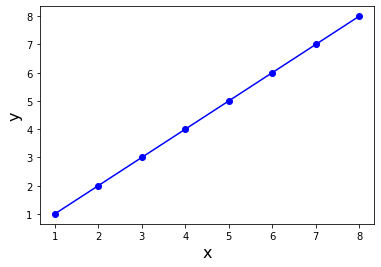

In [3]:
x = [1,2,3,4,5,6,7,8] # A simple example of setting up a list in Python. 
                      # Note that unlike Fortran or Java, you dont need to worrying about 
                      # typing and memory allocations here, which makes it very easy!
                      # (Note: anything after a hash is comment)

y = x                 # Set y to be equal to x

plt.plot(x,y,'bo-')   # Now plot the data!
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)

# Importing the COVID-19 Case Data

The first thing we need to do for data analysis is to actually get the data from somewhere. For most of us doing research, this data is most likely to be stored in some files. 

It is absolutely possible to write your own code to parse these files into the memory for doing data analysis. 

However, since COVID-19 is still unfolding in front of our eyes, people are still collecting data and updating it continuously. So we want to somehow get these data from some centralized data sources online and analyse them. Because Python is so powerful and popular. Someone has already written a package to let us easily retrieving the data directly from the internet for us to look at.

**What's the big deal of it?**

This comes handy, for example, if you work remotely and would like to download realtime data from some instruments and perform analysis.

**Get the data**

Now we get the time-series data from all the countries

In [0]:
import requests 
locations = requests.get('https://thevirustracker.com/timeline/map-data.json')
locations = locations.json()['data']

In [32]:
print(locations[0])

{'countrycode': 'SE', 'date': '6/05/20', 'cases': '42885', 'deaths': '4612', 'recovered': '0'}


OK, I see this is something started with a sqaured bracket, which means it is a list, so we can loop through it to inspect every item in it. One way to do a loop through it is like this:

In [33]:
for item in locations[0]:
  print(item)

countrycode
date
cases
deaths
recovered


Now you can probably tell these are the data from individual country in the world, and surely, there is A LOT of data. But what exactly are there in the data? 

If you look at individual item, they all start with a curely bracket, and follow a pattern like this:

{**key1**:*value1*,**key2**:*value2*, ...}

This is called a **dictionary** in Python, which you can look up the value corresponding to a key just like looking up the meaning of word in dictionaries.
Under the hood, Python is literally just a big big dictionary.

As a programmer who knows nothing about someone else's code, we can look at what's actually stored in all these dictionaries:

In [13]:
for key in locations[0].keys(): #getting the first item in the location list, and list all the keys in this dictionary.
  print(key)

for key in locations[0].values(): #getting the first item in the location list, and list all the keys in this dictionary.
  print(key)

countrycode
date
cases
deaths
recovered
SE
6/05/20
42885
4612
0


Now we need to actually get the timeline data from all the countries and plot them. Going back to our Prelude, all we need is a lot of lists of x's and y's for every countries. The code below are a bit messy, but all it does is to get the data out from the **location** list and put into another list of dictionaries in the form we want. Which you dont really need to bother about the details too much at this stage.


Single Pre Underscore is used for internal use or a dummy variable. An exmaple is shown below.

```
class Test:

    def __init__(self):
        self.name = "datacamp"
        self._num = 7

obj = Test()
print(obj.name)
print(obj._num)
```

```
>>> datacamp
>>> 7
```



In [0]:
from datetime import date

country_time_line_data = {}

country_dates ={}
for data in locations:
  if data['countrycode'] not in country_dates.keys():
    country_dates[data['countrycode']] = [] # day to start 

  # iterate for remaining days
  _s = [int(i) for i in data['date'].split('/')]
  this_date = date(_s[2],_s[0],_s[1])
  country_dates[data['countrycode']].append(this_date)

for data in locations:
  _s = [int(i) for i in data['date'].split('/')]
  this_date = date(_s[2],_s[0],_s[1])

  if data['countrycode'] not in country_time_line_data.keys():
    country_time_line_data[data['countrycode']] = {}
  
  elapsed_days = (this_date - min(country_dates[data['countrycode']])).days
  country_time_line_data[data['countrycode']][elapsed_days] = int(data['cases']) 


**A bit more details for those who are curious**

It is important to understand your problem and have a clear mind on what your final plot might look like before you write your code. Here I want a simple data, which for a given country, I want to be able to access the number of confirmed cases at day N from the day which the record has started. As such I can plot the number of cases versus day since first recorded day.

With this in mind, I basically loop through the existing information to get it tidy up in the form I need, which is basically the last line as coded above (i.e. a dictionary):



```
country_time_line_data['country'][elapsed_days] = number_of_cases
```

And this is what it will look like if I ask for the data of Australia (order of dictionary does not matter because **every key is unique**):


In [15]:
print(country_time_line_data['AU'])

{132: 7255, 131: 7251, 130: 7240, 129: 7229, 128: 7221, 127: 7204, 126: 7195, 125: 7185, 124: 7173, 123: 7157, 122: 7139, 121: 7133, 120: 7118, 119: 7114, 118: 7111, 117: 7095, 116: 7083, 115: 7080, 114: 7072, 113: 7062, 112: 7052, 111: 7036, 110: 7020, 109: 6999, 108: 6979, 107: 6972, 106: 6969, 105: 6942, 104: 6929, 103: 6914, 102: 6900, 101: 6878, 100: 6875, 99: 6825, 98: 6819, 97: 6781, 96: 6765, 95: 6766, 94: 6745, 93: 6740, 92: 6721, 91: 6714, 90: 6677, 89: 6661, 88: 6661, 87: 6547, 86: 6547, 85: 6547, 84: 6547, 83: 6547, 82: 6522, 81: 6462, 80: 6440, 79: 6415, 78: 6351, 77: 6315, 76: 6303, 75: 6215, 74: 6108, 73: 6010, 72: 5895, 71: 5797, 70: 5687, 69: 5550, 68: 5330, 67: 5330, 66: 4862, 65: 4559, 64: 4361, 63: 3984, 62: 3640, 61: 3143, 60: 2810, 59: 2364, 58: 2044, 57: 1682, 56: 1549, 55: 1071, 54: 791, 53: 681, 52: 568, 51: 452, 50: 377, 49: 297, 48: 250, 47: 200, 46: 128, 45: 128, 44: 107, 43: 91, 42: 76, 41: 63, 40: 60, 39: 55, 38: 52, 37: 39, 36: 30, 35: 27, 34: 25, 33: 15,

Now what people normally look at is the growth curve since 100 cases were reported in the country, so we can tidy up the data a bit further. 

In [27]:
_data = country_time_line_data
country_time_line_data_since_100 = {}
for country in _data.keys():
  first_day = None
  country_time_line_data_since_100[country] = {}

  #find out which day is the first day with a recorded confirmed case larger than 100
  for day in list(sorted(_data[country].keys())):
    if _data[country][day]>=100:
      first_day = day
      print(country,first_day,_data[country][first_day])
      break

  if first_day is not None:
  #use this day as the zeroth day and relabel all the data in the dictionary accordingly
    for day in  list(sorted(_data[country].keys())):
      if day - first_day >= 0:
        if country == 'China': print(day,_data[country][day])
        country_time_line_data_since_100[country][day-first_day] = _data[country][day]
  else:
    del country_time_line_data_since_100[country]


SE 35 101
AD 20 113
AE 49 113
AF 32 110
AL 14 104
AM 18 115
AO 82 113
AR 17 128
AT 12 104
AU 44 107
AZ 25 122
BA 17 126
BD 29 123
BE 31 109
BF 14 114
BG 12 127
BH 15 110
BJ 52 140
BN 15 104
BO 20 107
BR 16 151
BS 69 100
BY 31 152
CA 45 108
CD 21 109
CF 55 143
CG 31 117
CH 9 114
CI 16 101
CL 13 155
CM 23 139
CN 0 548
CO 13 102
CR 15 117
CU 16 119
CV 37 106
CY 14 116
CZ 12 141
DE 34 130
DJ 21 135
DK 12 264
DO 20 112
DP 3 135
DZ 25 139
EC 17 111
EE 16 115
EG 29 109
ES 30 120
ET 36 105
FI 44 155
FR 36 100
GA 34 108
GB 34 115
GE 33 103
GH 12 132
GN 22 111
GQ 40 214
GR 16 190
GT 27 126
GW 36 205
GY 59 104
HN 18 110
HR 23 105
HT 45 100
HU 17 103
ID 13 117
IE 14 129
IL 20 100
IN 44 102
IQ 18 101
IR 7 139
IS 13 103
IT 23 155
JM 35 125
JO 19 112
JP 30 105
KE 20 110
KG 13 107
KH 62 103
KM 29 106
KR 29 104
KW 19 104
KZ 13 111
LB 23 110
LK 57 102
LR 36 101
LT 23 143
LU 17 140
LV 18 111
LY 65 105
MA 20 115
MD 15 109
ME 14 109
MG 22 102
MK 25 115
ML 18 105
MM 23 111
MN 67 135
MR 66 131
MT 16 107
MU 1

# Making a Plot - The initial attempt#

Now without worrying about any presentation issues, let's just first plot the data and see how the data look like.

I called this 'initial inspection'. It is always important to get a feeling on how the raw data looks like and then decide what might be some good 'cosmetic surgeries' to do on it to make it look good. 

Remember, we just need x's and y's, and we do that by looping through all the countries.

Text(0, 0.5, 'Confirmed Cases')

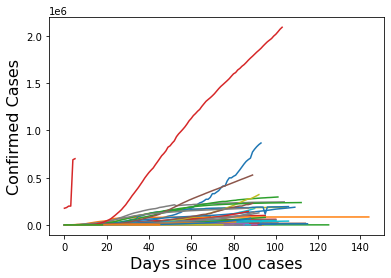

In [28]:
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]
  number_of_elapsed_days = list(_d.keys())
  number_of_cases_at_day_X = [_d[k] for k in _d.keys()]
  plt.plot(number_of_elapsed_days, number_of_cases_at_day_X, '-')
  
plt.xlabel('Days since 100 cases', fontsize=16)
plt.ylabel('Confirmed Cases', fontsize=16)

Well, this looks horrible, one data is clearly outshooting the rest. So the first thing we can do is to plot this with y in log-scale. This can be done by asking the yscale to be in log.

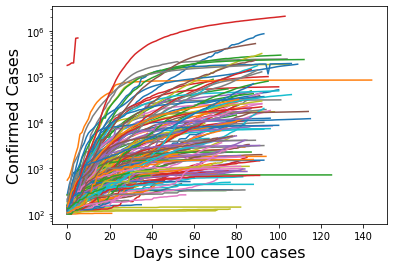

In [29]:
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]
  plt.plot(list(_d.keys()), [_d[k] for k in _d.keys()], '-')
  
plt.xlabel('Days since 100 cases', fontsize=16)
plt.ylabel('Confirmed Cases', fontsize=16)
plt.yscale('log')

# Tuning the Plot - Highlighting Specfic Data on the Plot

The first thing you noticed here, is that default color scheme from Python is just simply messy with so many countries in the world! So we need to tune the color a bit to highlight what we want to show.

Typically I spend a lot of time tuning my plots to make them look good. To do this, the first question to ask yourself is:

**What message do I really want to convey?**

For this demo, let's say we just want to highlight the cases for Australia, China and the U.S. So the next thing is about choosing colors that can hightlight your message on the plot.

Of course, choosing color is by no mean easy. I use the color combination guide on line a lot, such as this one: https://visme.co/blog/color-combinations/. But at the end of the day, it really depends on your problem and your color preferences. 

Come back to the covid-19 curve, because we only want to highlight three countries on the plot, what I normally do is to use the colors on the flags of Germany to highlight these three cases, then put the rest as background grey color.



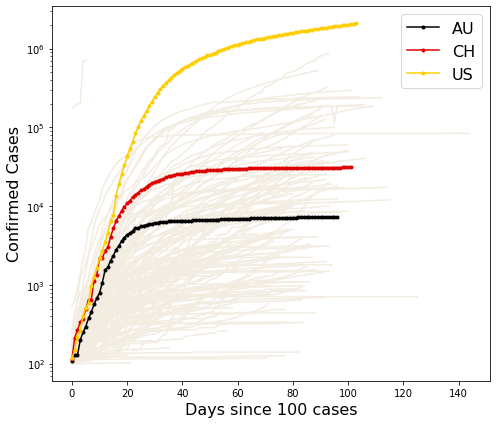

In [30]:
country_to_highlight = ['AU', 'CH', 'US']
background_grey = '#F2ECE1'
highlight_color_dict = {'AU':'#000000', #hex code for black
                        'CH':'#dd0000', #hex code for electric red
                        'US':'#ffce00' #hex code for tangerine yellow
                        }

plt.figure(figsize=(7,6)) # this sets the size of the figure

#Plot all data first, this will goes into the background as they are coded first
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]
  plt.plot(list(_d.keys()), [_d[k] for k in _d.keys()], '-', c=background_grey)

#Next plot the three countries that we want to highlight
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]
  if country in country_to_highlight:
    plt.plot(list(_d.keys()), [_d[k] for k in _d.keys()], '.-', c=highlight_color_dict[country], label=country)

plt.xlabel('Days since 100 cases', fontsize=16)
plt.ylabel('Confirmed Cases', fontsize=16)
plt.yscale('log')
  
#and we put the lengend for the three countries that we want to highlight
plt.legend(fontsize=16)

plt.tight_layout()

#plt.savefig('filename.pdf') #this will allow you to save the plot into a high resolution image

Now you already have a graph that can go into a paper!

# Going Interactive with Your Plot

For most of us, we can probably stop here, as a static graph is what we need for a paper-based publication. But Python offers many interactive plotting tools for you to be able to explore the data. This is very helpful if the data is very complex and you would like to explore the data in more details, or you need to share/present your data to the others. You'll then be able to dig out the information you need live on the plot. Let's just try to make one with the Python library called BOKEH.

First of all, let's just fire up Bokeh and make a very simple static plot. This is very similar to what we have done before.

In [35]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
output_notebook()

#here first set up a basic Bokeh figure object 
plot = figure(plot_width=800, 
              plot_height=400, 
              tools="tap", 
              title="Covid-19 Confirmed Cases Timeline", 
              y_axis_type="log",
              x_axis_label="Days since 100 cases",
              y_axis_label="Confirmed Cases")

#now as before, we plot the line curve first
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]
  plot.line(list(_d.keys()), [_d[k] for k in _d.keys()])

show(plot)

First we add some simple tools for navigation purposes, such as the magnify glasses, moving plots up and down, shifting the curve to left or rights. etc

In [36]:
plot = figure(plot_width=800, 
              plot_height=400, 
              tools="tap,wheel_zoom,box_zoom,reset",   #this is where we add the tools (https://docs.bokeh.org/en/latest/docs/user_guide/tools.html)
              title="Covid-19 Confirmed Cases Timeline", 
              y_axis_type="log",
              x_axis_label="Days since 100 cases",
              y_axis_label="Confirmed Cases")

#now as before, we plot the line curve first
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]
  plot.line(list(_d.keys()), [_d[k] for k in _d.keys()])

show(plot)

Next up we want to be able to retrieve some information on the plot when we hoover our mouse over it.

In [37]:
from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool

# | country   | day | cases |
# | Australia | 0.  | 100.  |
# | Australia | 1.  | 101.  |
# ....
# | USA       | 0   | 100.  |
# | USA       | 1.  | 200.  |
# ...

_days = []
_cases = []
_countries = []
for country in country_time_line_data_since_100.keys():
  _d = country_time_line_data_since_100[country]

  for day in list(_d.keys()):
    _days.append(day)
    _cases.append(_d[day])
    _countries.append(country)

source = ColumnDataSource(data=dict(
    days=_days,
    cases=_cases,
    countries=_countries,
))

TOOLTIPS = [
    ("country", "@countries"),
    ("days", "@days"),
    ("cases", "@cases"),
]

plot = figure(plot_width=800, 
              plot_height=400, 
              tools="tap,wheel_zoom,box_zoom,reset,hover",   #this is where we add the tools (https://docs.bokeh.org/en/latest/docs/user_guide/tools.html)
              title="Covid-19 Confirmed Cases Timeline", 
              y_axis_type="log",
              x_axis_label="Days since 100 cases",
              y_axis_label="Confirmed Cases",
              tooltips=TOOLTIPS)

plot.circle('days', 'cases', size=5, source=source)
show(plot)

Now as the last example, let's attempt something more ambitious. Let's try to reproduce the interactive plot, whereby when your mouse hover onto a particular line, the line got highlighted and the rest dimmed into the background. 

A **Caveat**: I have no idea at the beginning how to do this. So I need to search the web andthe documentations of Bokeh to figure it out. Remember, Google is your best friend when it comes to programming. I still Google every little things that I try to code every day! No one can possibily remember how to do everthing, and there is always a better way to get something done!

And after I Googled it a bit, the answer is here:

https://stackoverflow.com/a/42707872

which I copied it and did it with a bit of twist


In [38]:
from collections import defaultdict

import numpy as np
from scipy.stats import norm

from bokeh.plotting import show, figure
from bokeh.models import ColumnDataSource, HoverTool
import math

covid_data = defaultdict(list)

for country in country_time_line_data_since_100.keys():
  covid_data['country'].append(np.array(country))
  _d = country_time_line_data_since_100[country]
  covid_data['days'].append(list(_d.keys()))
  covid_data['cases'].append([math.log(_d[k],10) for k in _d.keys()])
  covid_data['latest_cases'].append(int(math.pow(10,covid_data['cases'][-1][-1])))
covid_data['color'] = ['#dd0000' for _ in covid_data['cases']]

source = ColumnDataSource(data=dict(country=covid_data['country'],
                                    days=covid_data['days'],
                                    cases=covid_data['cases'],
                                    color=covid_data['color'],
                                    latest=covid_data['latest_cases']
                                    ))

p = figure(plot_height=400)
p.multi_line(xs='days', ys='cases', 
             line_width=2, line_color='color', line_alpha=0.1,
             hover_line_color='color', hover_line_alpha=1.0,
             source=source)

p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('country', '@country'),
    ('lastest cases', '@latest')
]))

show(p)

# A Simple Machine Learning

Coming to the last part of this tutorial, we would like to demonstrate you a simple example on how Python makes machine--learning very easy for beginners of the fields, with some very well documented and powerful packages.

Now although there are lots of statistics and mathematics behind machine-learnings, and a large bag-full of different ML methods to deal with different tasks at different level of complexities, we can quickly step into the field by just looking at a very simple task:

**Fitting a curve**

which is a form of *supervised learning*. While many physical phenomena are governed by well-defined physics with analytical formula, as the world becomes more complex, many of the data are lack of well-defined mathematical forms to model, and supervised learning provides a way to *learn* a workable relationship between data, such that we can predict (or more precisely, *interpolate*) the behaviour of new observables. 

The goal for this exercise is to see how can we *learn* the pattern of the covid-19 curve for Japan. I chose Japan because the curve seems to have more features than the other countries. 

Bring back the code from before, let's first dig out the data for Japan:


Text(0, 0.5, 'y')

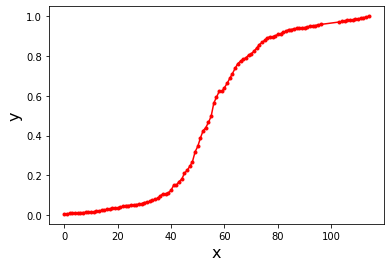

In [39]:
_d = country_time_line_data_since_100['JP']
x=list(sorted(_d.keys()))
y=[_d[k] for k in list(sorted(_d.keys()))]
y=[i/max(y) for i in y]
plt.plot(x, y, '.-', c='r')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

You might have noticed that I changed the axis label to $x$ and $y$. And I also normalized $y$ to make the thing further simplified. The reason is that I would just like to treat this as a general mathematical problem and ignore the real context behind. This also simplifies the notations a bit.

What we will be playing around is a method called **Gaussian Process (GP)** regressions to fit this data. Now the maths for GP is really horrific, even for me. But we can use some very hand-wavy argument to try understand what it is.

If we start from a **linear regression**, what we are trying to do is to fit a series of $\mathbf{x}$ to a series of $\mathbf{y}$ according to a linear relationship:

\begin{equation}
\mathbf{y}=k\mathbf{x}+b
\end{equation}

Where most of us will be familiar with this and think $k$ being the ***gradient*** and $b$ being the ***intercept***. In the ML world, we interpret them both as some sort of ***probabilities***. 

First, suppose the data is so complex and we have to model them as a degree-$n$ polynomial:

\begin{equation}
\mathbf{y}=k_{0}+k_{1}\mathbf{x}+k_{2}\mathbf{x}^2+\cdots+k_{n}\mathbf{x}^{n}=\sum_{i=0}^{n}k_{i}\mathbf{x}^{i}
\end{equation}

Now instead of thinking $k_{i}$ as the ***expansion coefficient***, we can alternatively think $k_{i}$ is the ***probability or likelihood*** of $\mathbf{y}$ being modelled by polynomial $\mathbf{x}^{i}$ among set of possible choices $\{\mathbf{x}^{0},\mathbf{x},\mathbf{x}^{2},\ldots,\mathbf{x}^{n}\}$.

To generalised a bit further, what if we dont know what would be a good set of basis functions to choose to model a given set of data? Well, we can still write down exactly the same thing by keeping things general. Say, the set of the function might look like 

\begin{equation}
 \left\{f_{0}(\mathbf{x}),f_{1}(\mathbf{x}),f_{2}(\mathbf{x}),\ldots,f_{n}(\mathbf{x})\right\}
\end{equation}

such that

\begin{equation}
\mathbf{y}=k_{0}f_{0}(\mathbf{x})+k_{1}f_{1}(\mathbf{x})+k_{2}f_{2}(\mathbf{x})+\cdots+k_{n}f_{n}(\mathbf{x})=\sum_{i=0}^{n}k_{i}f_{n}(\mathbf{x})
\end{equation}

and as a first order of approximation, by the name of ***Gaussian Process***, you can pretty much guess that it tries to use the Gaussian functions as the basis functions, and tries to learn the expansion coefficients $k_{i}$'s, such that the error of predictions:

\begin{equation}
\mbox{Error}=\left\vert \mathbf{y}^{pred} - \mathbf{y}^{true}\right\vert
\end{equation}

is minimised.

***First Step***

We plot the target function and define the bound between which where we have the most observables

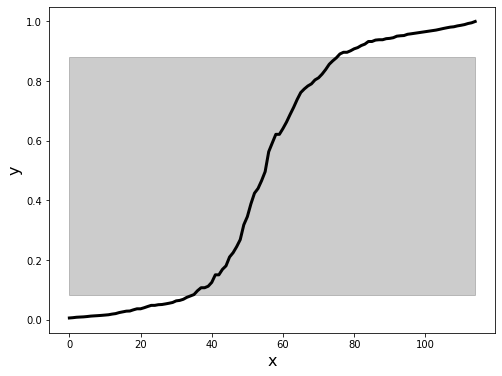

In [40]:
plt.figure(figsize=(8,6))

plt.plot(x, y, 'k-', lw=3, label='Target function')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.fill_between(x, np.mean(y) - np.std(y), np.mean(y) + np.std(y),
                     alpha=0.2, color='k')

***Second Step*** 

Let us have a look at the possible basis functions that can be drawn to approximate the target function. Note that all these basis function are given with equal probability, and the distributions are often referred as the prior distributions

Text(0.5, 1.0, 'Prior')

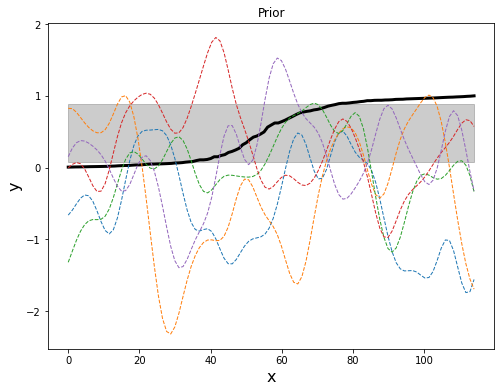

In [41]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#+++++carried over from previous plot
plt.figure(figsize=(8,6))
plt.plot(x, y, 'k-', lw=3, label='Target function')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.fill_between(x, np.mean(y) - np.std(y), np.mean(y) + np.std(y),
                     alpha=0.2, color='k')
#++++++++++++++++++++++++++++++++++++

#define a kernel and Gaussian process object
kernel = 0.5 * RBF(length_scale=5.0, length_scale_bounds=(1e-1, 10.0))
gp = GaussianProcessRegressor(kernel=kernel)

X_ = np.linspace(0, max(x),100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)

#drawing sample functions from the prior probability distribution function, which
#simply says all functions are equal likely to be drawn
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

plt.plot(X_, y_samples, '--', lw=1)
plt.title("Prior")

***Third Step***

Now let's see what will happen if we let the machine see 50 random data on the covid curve, how will it change the behaviours of the basis function.



/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


(-0.5, 1.5)

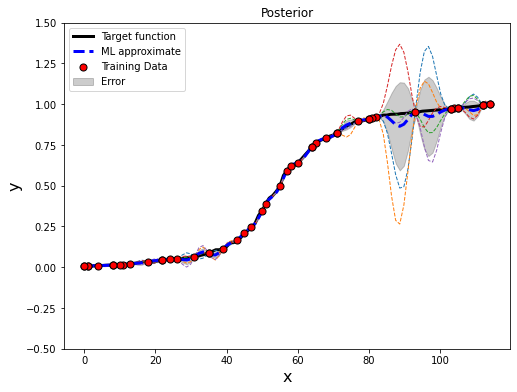

In [45]:
number_of_training_data = 50
#Selecting a bunch of training data
indicies = np.random.randint(len(x), size=number_of_training_data)
_x_target = np.array([x[i] for i in indicies]).reshape(-1, 1)
_y_target = np.array([y[i] for i in indicies]).reshape(-1, 1)

#This is training the ML model, literally just one line!
gp.fit(_x_target,_y_target) 

plt.figure(figsize=(8,6))

#Let's plot the original function that we want to model
plt.plot(x, y, 'k-', lw=3, label='Target function')
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)

#Plotting out the function that is learnt by the GP model
plt.plot(X_, y_mean, 'b--', lw=3, zorder=9, label='ML approximate')
plt.scatter(_x_target, _y_target, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label="Training Data")

#What is the confidence limit in our prediction?
up = (y_mean - y_std.reshape(-1,1)).reshape(1,-1)[0]
down = (y_mean + y_std.reshape(-1,1)).reshape(1,-1)[0]
plt.fill_between(X_, up, down, alpha=0.2, color='k',label='Error')

#Look at some of the basis functions that are most likely to be selected by the model
# to represent the target function, after seeing some training data?
X_ = np.linspace(0, max(x),100)
y_samples = gp.sample_y(X_[:, np.newaxis], 5) 
for i in range(5):
  plt.plot(X_, y_samples[:,:,i], '--', lw=1)

plt.title("Posterior")
plt.legend(loc=2)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.ylim([-0.5,1.5])

As you can see, after letting the model seeing five data points (training data), the distributions of the basis functions changed dramatically. Those functions that pass through the training data got picked with highest probability, and are now accurately modelled. Whereas in the region between points that are not provided during the training, the prediction error grows as the points becomes further away from the training points. 

One of the main challenge in ML is how to obtain a good ML model with the usage of as little training data as possible. 

This is beyond the scope of this tutorial. But I hope that this demonstration may spark your interests to pick up Python as a new tool for your research in the coming days!